# For demonstration purpose only (not working) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import pennylane as qml
from pennylane import numpy as pnp

import warnings
warnings.filterwarnings('ignore')

In [2]:
n = 10
sky_image = np.zeros((n, n), dtype='complex64')
mask = np.zeros((n, n), dtype='bool')
number_of_stars = np.random.randint(1, 7)
radius = 1 

for i in range(0, number_of_stars):
    index_i = np.random.randint(0, sky_image.shape[0]-radius)
    index_j = np.random.randint(0, sky_image.shape[1]-radius)
    for j in range(0, radius):
        for k in range(0, radius):
            sky_image[index_i+j][index_j+k] = complex(np.random.rand()*100, np.random.rand()*100)
            mask[index_i+j][index_j+k] = True
            
sky_image.real += np.random.randn(n,n)/100
sky_image.imag += np.random.randn(n,n)/100

print(sky_image)

[[-7.38043198e-03+9.31893662e-03j -1.46005638e-02-2.66356822e-02j
  -6.85083261e-03+3.05277575e-03j  1.22424252e-02-1.36159752e-02j
   6.76906202e-03+1.29681146e-02j  7.13950442e-03+1.48583285e-03j
   4.28551761e-03-1.08316978e-02j  8.07522610e-03+6.70980662e-03j
  -1.31468736e-02+2.86348257e-02j  8.61616246e-03-1.01262340e-02j]
 [-7.29976967e-03+3.62344831e-03j -8.41844454e-03-1.34656746e-02j
  -4.01054742e-03+9.01762675e-03j  4.64162527e-04+4.79395781e-03j
   9.31430794e-03-2.85856915e-03j  2.36465293e-03+4.19295952e-03j
  -7.03950180e-03+2.26486474e-02j  5.27988281e-03-6.34497032e-03j
   5.20918611e-03-7.01550581e-03j  5.21858549e-03+5.93592133e-03j]
 [-1.20894406e-02+1.24847321e-02j  2.11116765e-02+4.52002278e-03j
  -1.59478572e-03-8.93033482e-03j -2.12305516e-04-6.31408184e-04j
   3.60773643e-03-1.49565125e-02j  8.91366042e-03+1.29433367e-02j
   1.26415929e-02+1.07608060e-03j  8.53352528e-03-6.02305681e-03j
  -3.75207001e-03+1.00928880e-02j  1.23191439e-02+1.13269622e-02j]
 [-6.73

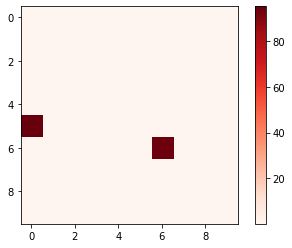

In [3]:
modulus = np.absolute(sky_image)
plt.imshow(modulus, cmap='Reds')
plt.colorbar();

In [4]:
visibilities = np.fft.fft2(sky_image).astype('complex64')
print(visibilities)

[[ 162.52223   +89.36928j    -2.7115738 +20.90624j
   171.13422   -20.7264j     55.006683 +115.14817j
    69.12254   -63.197357j  162.44565   +89.3013j
    -2.637215  +20.703327j  171.34563   -20.990162j
    55.13787  +115.04741j    69.23936   -63.226967j]
 [-184.81895   -35.666462j  -10.984747  -77.246544j
  -127.22303   +58.647385j -113.081116 -119.66534j
   -19.655714  +33.049385j -184.93292   -35.284138j
   -10.995338  -77.18324j  -127.085     +58.607906j
  -113.01331  -119.7082j    -19.629559  +32.953197j]
 [ 171.39508   -20.89323j    55.09975  +115.04213j
    69.24443   -63.319878j  162.57301   +89.477585j
    -2.5006938 +20.744629j  171.25706   -20.852102j
    55.318554 +115.109314j   69.24297   -63.278214j
   162.6361    +89.216705j   -2.6989744 +20.754778j]
 [-127.18206   +58.65635j  -113.148125 -119.493965j
   -19.57954   +32.85548j  -184.71262   -35.52803j
   -11.029415  -77.15887j  -127.22237   +58.727886j
  -112.974884 -119.58348j   -19.773775  +32.859425j
  -184.73596   -

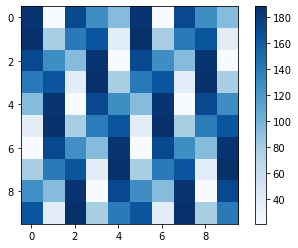

In [5]:
modulus = np.absolute(visibilities)
plt.imshow(modulus, cmap='Blues')
plt.colorbar();

In [6]:
sanity = np.fft.ifft2(visibilities).astype('complex64')

test1_real = ((sky_image.real - sanity.real)**2).mean()
test1_imag = ((sky_image.imag - sanity.imag)**2).mean()
 
print('Reals MSE: '+ str(test1_real))
print('Imaginaries MSE: '+ str(test1_imag))

Reals MSE: 4.0227106e-14
Imaginaries MSE: 4.3856645e-14


In [7]:
print( 'Encodes log2(n) qubits: ' + str(math.log2(n*n)) )

Encodes log2(n) qubits: 6.643856189774724


Wires: range(0, 7)
100
128


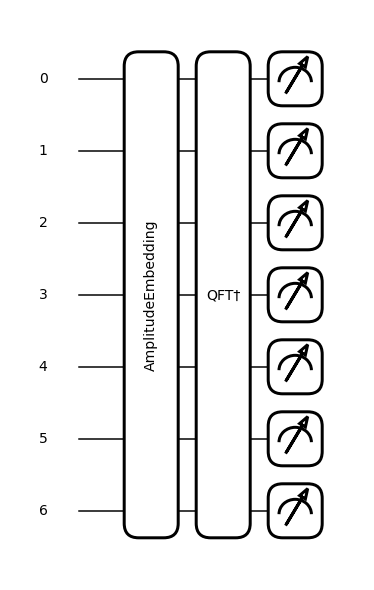

In [8]:
n_n = visibilities.shape[0]*visibilities.shape[1]
inp = visibilities.flatten()

norm = qml.math.sum(qml.math.abs(inp) ** 2)
#normalized_data = data / qml.math.sqrt(norm)

wires = range(math.ceil(math.log2(n_n)))
print( 'Wires: ' + str(wires) )
amp_dev = qml.device('default.qubit', wires)


@qml.qnode(amp_dev)
def amp_encoding(data):
    qml.AmplitudeEmbedding(data, wires, normalize=True, pad_with=0.)
    qml.adjoint(qml.QFT)(wires=wires)
    return qml.state()

readout = amp_encoding(inp).astype('complex64')
qml.draw_mpl(amp_encoding)(inp)

print(len(inp))
print(len(readout))

readout.numpy()
readout = readout[:100]
readout = readout*qml.math.sqrt(norm)
readout = np.array(readout).reshape(sky_image.shape[0] , sky_image.shape[1])

In [9]:
fidelity = readout

print(fidelity)
print()
print(sky_image)
#fidelity = np.fft.ifft2(readout).astype('complex64')

test2_real = ((sky_image.real - fidelity.real)**2).mean()
test2_imag = ((sky_image.imag - fidelity.imag)**2).mean()

print('Reals MSE: '+ str(test2_real))
print('Imaginaries MSE: '+ str(test2_imag))

[[-6.5234557e-02+8.2369104e-02j  4.5536068e+01-2.7316957e+01j
   8.3521332e+01+1.5806888e+01j  4.9218456e+01+6.6261658e+01j
  -5.6266441e+00+4.0286015e+01j  2.1319792e+01+4.1634491e+01j
   5.0800430e+02-9.1025162e+01j -2.5772650e+02-1.7768730e+02j
  -1.4047750e+01-6.4075661e+01j  2.1150823e+00-3.6588163e+00j]
 [-1.2178023e+01+3.7735865e+00j -9.7141657e+00-4.8612132e+00j
  -1.1962597e+00-3.5386171e+00j -1.9135211e-01+3.0238494e-01j
   1.0456384e+00-1.8439823e-01j  5.2730489e+00+3.1328020e+00j
   1.9048183e-01+1.1484077e+01j -1.6800133e+01+1.2527527e+00j
  -7.7399135e+00+1.1937168e+02j  1.8513940e+02-7.1135567e+01j]
 [-5.4342911e+01-3.5344120e+01j -2.4663916e+00-2.2640207e+01j
   4.5710592e+00-4.6199961e+00j -6.3728875e-01-7.0980683e-02j
  -1.0812283e+00-1.9434545e+00j  2.8765228e-01-1.0963504e+00j
  -5.2651250e-01+2.8964776e-01j -6.1337775e-01-6.7155057e-01j
  -6.2062681e-01+2.8395543e+00j -1.4581890e+01+6.5773535e+00j]
 [-5.5372257e+01-3.1048164e+01j  1.3783994e+01+1.8328380e+02j
   1.

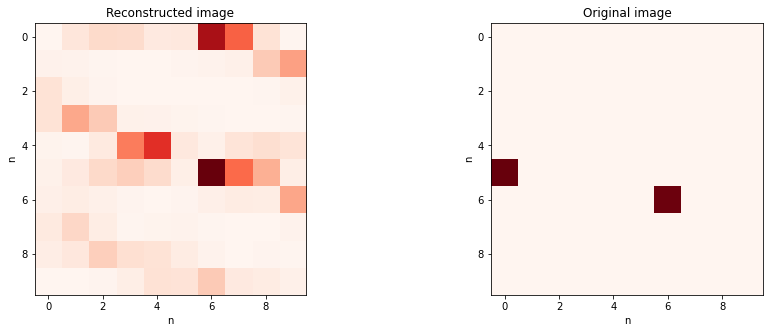

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
modulus1 = np.absolute(fidelity)
modulus2 = np.absolute(sky_image)

axs[0].imshow(modulus1, cmap='Reds')
axs[1].imshow(modulus2, cmap='Reds')

axs[0].set_title("Reconstructed image")
axs[1].set_title("Original image")

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='n')